# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [21]:
data = pd.read_csv('weight-height.csv')
male_df = data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

# Male Height mean: 69.02634590621737
male_height_mean = male_df['Height'].mean()
male_height_mean

# Male Height sd: 2.8633622286606517
male_height_sd = male_df['Height'].std()
male_height_sd

# Male Weight mean: 187.0206206581929
male_weight_mean = male_df['Weight'].mean()
male_weight_mean

# Male Weight sd: 19.781154516763813
male_weight_sd = male_df['Weight'].std()
male_weight_sd

# Female Height mean: 63.708773603424916
female_height_mean = female_df['Height'].mean()
female_height_mean

# Female Height sd: 2.696284015765056
female_height_sd = female_df['Height'].std()
female_height_sd

# Female Weight mean: 135.8600930074687
female_weight_mean = female_df['Weight'].mean()
female_weight_mean

# Female Weight sd: 19.022467805319007
female_weight_sd = female_df['Weight'].std()
female_weight_sd

19.022467805319028

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

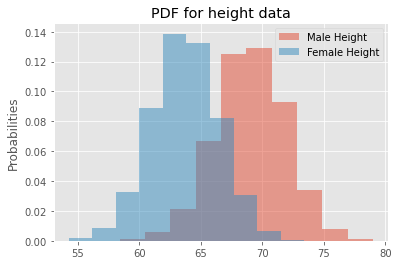

In [44]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, density=True, label = 'Male Height', alpha = 0.5)
female_df.Height.plot.hist(bins = binsize, density=True, label = 'Female Height', alpha = 0.5)
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

From the histograms, it appears that the median female height is lower than the median male height, which is in line with expectations. Moreover, both male and female height appear to follow apparently normal distributions which is also to be expected for physical traits of a large population.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

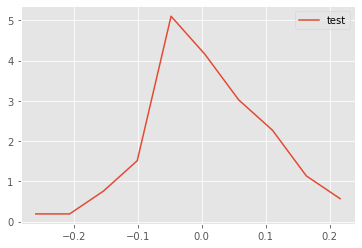

In [43]:
def density(x):
    
    # create bins
    n, bins = np.histogram(x, 10, density = 1)
    
    # initialize arrays
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    # populate arrays
    for j in range(n.size):
        pdfx[j] = 0.5*(bins[j] + bins[j+1])
        pdfy[j] = n[j]
    
    return pdfx, pdfy
    
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

## Add overlapping density plots to the histograms plotted earlier

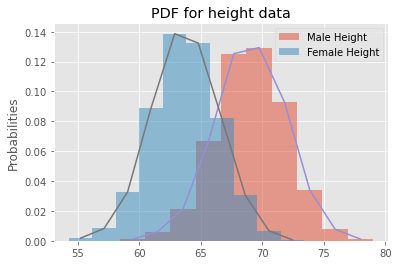

In [50]:
male_df.Height.plot.hist(bins = binsize, density=True, label = 'Male Height', alpha = 0.5)
female_df.Height.plot.hist(bins = binsize, density=True, label = 'Female Height', alpha = 0.5)
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

## Repeat the above exercise for male and female weights

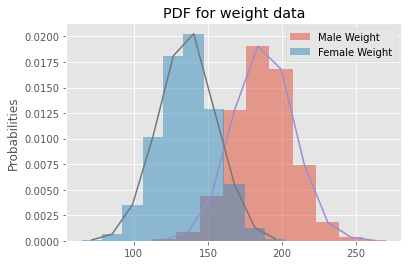

In [53]:
male_df.Weight.plot.hist(bins = binsize, density=True, label = 'Male Weight', alpha = 0.5)
female_df.Weight.plot.hist(bins = binsize, density=True, label = 'Female Weight', alpha = 0.5)
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for weight data')
plt.show()

## Write your observations in the cell below

Similarly to male and female height, the female median weight is lower than male median weight. Both follow bell-curve distrbutions with some overlapping area.

Comparing height and weights, the charts are largely similar, with median female height and weight falling below those of males.

## Repeat the above experiments in seaborn and compare with your results

/Users/Amelia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Amelia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


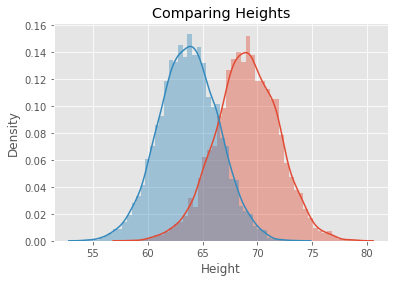

In [56]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/Users/Amelia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Amelia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


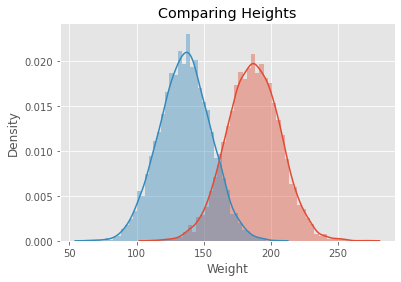

In [57]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Heights')
plt.show()

The seaborn plots are a bit easier to see. Because of this, it is more obvious that male weight is more widely distributed than female weight, whereas male and female heights are similarly distributed.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.